**T6.1**


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 2s - loss: 0.5084 - accuracy: 0.8223 - val_loss: 0.4451 - val_accuracy: 0.8376
Epoch 2/15
 - 2s - loss: 0.3769 - accuracy: 0.8655 - val_loss: 0.4039 - val_accuracy: 0.8566
Epoch 3/15
 - 2s - loss: 0.3303 - accuracy: 0.8810 - val_loss: 0.3728 - val_accuracy: 0.8677
Epoch 4/15
 - 2s - loss: 0.3072 - accuracy: 0.8894 - val_loss: 0.3538 - val_accuracy: 0.8723
Epoch 5/15
 - 2s - loss: 0.2853 - accuracy: 0.8952 - val_loss: 0.3462 - val_accuracy: 0.8776
Epoch 6/15
 - 2s - loss: 0.2716 - accuracy: 0.9011 - val_loss: 0.3332 - val_accuracy: 0.8753
Epoch 7/15
 - 2s - loss: 0.2553 - accuracy: 0.9060 - val_loss: 0.3237 - val_accuracy: 0.8878
Epoch 8/15
 - 2s - loss: 0.2434 - accuracy: 0.9111 - val_loss: 0.3286 - val_accuracy: 0.8815
Epoch 9/15
 - 2s - loss: 0.2353 - accuracy: 0.9115 - val_loss: 0.3486 - val_accuracy: 0.8785
Epoch 10/15
 - 2s - loss: 0.2220 - accuracy: 0.9184 - val_loss: 0.3229 - val_accuracy: 0.8838
Epoch 11/15
 - 2s -

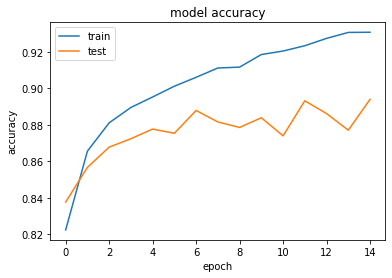

Scores:  [0.3137714891791344, 0.8938999772071838]
Erro modelo MLP: 10.61%


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
from tensorflow.keras.datasets import fashion_mnist

def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

# fixar random seed para se puder reproduzir os resultados
seed = 9
np.random.seed(seed)

# Etapa 1 - preparar o dataset
'''
fazer o download do MNIST dataset com imagens de digitos escritos à mão para fazer a
sua classificação (já pré-preparados)
dataset: https://s3.amazonaws.com/img-datasets/mnist.npz
O ficheiro já tem tudo separado nos ficheiros {x_test.npy, x_train.npy, y_test.npy,
y_train.npy}
Os atributos de entrada estão com matrizes 3D(imagem, largura,altura) e os atributos de
saída é uma lista com o número correspondente
'''
def load_mnist_dataset(path='mnist.npz'):
    path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)

# Visualizar 6 imagens do mnist numa escala de cinzentos
def visualize_mnist():
    (X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
    plt.subplot(322)
    plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
    plt.subplot(323)
    plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
    plt.subplot(324)
    plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
    plt.subplot(325)
    plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
    plt.subplot(326)
    plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
    plt.show()
    
# Etapa 2 - Definir a topologia da rede (arquitectura do modelo) e compilar (multilayer_perceptrons)
'''
cria-se um modelo sequencial e vai-se acrescentando camadas (layers)
vamos criar uma rede simples com uma camada escondida
Dense class significa que teremos um modelo fully connected
 o primeiro parametro estabelece o número de neuronios na camada (num_pixeis na primeira)
 input_dim=num_pixeis indica o número de entradas do nosso dataset (num_pixeis atributos neste
caso)
 kernel_initializer indica o metodo de inicialização dos pesos das ligações
 'nomal' sigifica com small number generator from Gaussion distribution
 "activation" indica a activation fuction
 'relu' rectifier linear unit activation function com range entre 0 e infinito
 'softmax' foi utilizada para garantir uma percentagem (valor entre 0 e 1) a totalizar entre
todas as saidas o valor de 1
Compile - loss - funcão a ser utilizada no calculo da diferença entre o pretendido e o obtido
vamos utilizar logaritmic loss para classificação binária: 'categorical_crossentropy'
o algoritmo de gradient descent será o “adam” pois é eficiente
a métrica a ser utilizada no report durante o treino será 'accuracy' pois trata-se de um problema de
classificacao
'''
def create_compile_model_mlp(num_pixels, num_classes):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

#util para visualizar a topologia da rede num ficheiro em pdf ou png
def print_model(model,fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)
    
#utils para visulaização do historial de aprendizagem
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def mnist_fashion_utilizando_mlp():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # transformar a matriz 28*28 das imagens num vector com 784 atributos para cada imagem (porque é multilayer-perceptron)
    num_pixels= X_train.shape[1] * X_train.shape[2]
    X_train= X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
    X_test= X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train= X_train/ 255
    X_test= X_test/ 255
    # transformar o label que é um inteiro em categorias binárias, o valor passa a ser o correspondente à posição
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train= np_utils.to_categorical(y_train)
    y_test= np_utils.to_categorical(y_test)
    num_classes= y_test.shape[1]
    # definir a topologia da rede e compilar 
    model = create_compile_model_mlp(num_pixels, num_classes)
    print_model(model,"modelT6.1.png")
    # treinar a rede
    plotlosses = PlotLossesKeras()
    # mais 5 epochs & batch size igual
    history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200, verbose=2
                      )
    print_history_accuracy(history)
    # Avaliação final com os casos de teste
    scores = model.evaluate(X_test, y_test, verbose=0)
    print('Scores: ', scores)
    print("Erro modelo MLP: %.2f%%"% (100-scores[1]*100))

if __name__ == '__main__':
 #visualize_mnist()
 mnist_fashion_utilizando_mlp()

**T6.2**


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 5s - loss: 0.6084 - accuracy: 0.7802 - val_loss: 0.4580 - val_accuracy: 0.8349
Epoch 2/15
 - 4s - loss: 0.3610 - accuracy: 0.8708 - val_loss: 0.3504 - val_accuracy: 0.8765
Epoch 3/15
 - 4s - loss: 0.3095 - accuracy: 0.8873 - val_loss: 0.3140 - val_accuracy: 0.8872
Epoch 4/15
 - 4s - loss: 0.2766 - accuracy: 0.8985 - val_loss: 0.2872 - val_accuracy: 0.8957
Epoch 5/15
 - 4s - loss: 0.2529 - accuracy: 0.9062 - val_loss: 0.2798 - val_accuracy: 0.9001
Epoch 6/15
 - 4s - loss: 0.2358 - accuracy: 0.9117 - val_loss: 0.2793 - val_accuracy: 0.8972
Epoch 7/15
 - 4s - loss: 0.2141 - accuracy: 0.9207 - val_loss: 0.2706 - val_accuracy: 0.9037
Epoch 8/15
 - 4s - loss: 0.2027 - accuracy: 0.9241 - val_loss: 0.2844 - val_accuracy: 0.9006
Epoch 9/15
 - 4s - loss: 0.1887 - accuracy: 0.9287 - val_loss: 0.2559 - val_accuracy: 0.9097
Epoch 10/15
 - 4s - loss: 0.1748 - accuracy: 0.9339 - val_loss: 0.2637 - val_accuracy: 0.9076
Epoch 11/15
 - 4s -

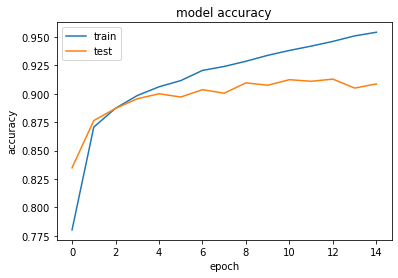

Scores:  [0.28161505945920945, 0.9088000059127808]
Erro modelo MLP: 9.12%


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import  tensorflow as tf
import keras.backend.tensorflow_backend as tfback
from keras.utils.data_utils import get_file
from tensorflow.keras.datasets import fashion_mnist
from livelossplot import PlotLossesKeras

def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

# fixar random seed para se puder reproduzir os resultados
seed = 9
np.random.seed(seed)

#util para visualizar a topologia da rede num ficheiro em pdf ou png
def print_model(model,fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)

def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Etapa 1 - preparar o dataset
'''
fazer o download do MNIST dataset com imagens de digitos escritos à mão para fazer a
sua classificação (já pré-preparados)
dataset: https://s3.amazonaws.com/img-datasets/mnist.npz
O ficheiro já tem tudo separado nos ficheiros {x_test.npy, x_train.npy, y_test.npy,
y_train.npy}
Os atributos de entrada estão com matrizes 3D(imagem, largura,altura) e os atributos de
saída é uma lista com o número correspondente
'''
def load_mnist_dataset(path='mnist.npz'):
    path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)

# Etapa 2 - Definir a topologia da rede (arquitectura do modelo) e compilar 
def create_compile_model_cnn_evoluida(num_classes):
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu',data_format = 'channels_first'))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(240, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def mnist_fashion_utilizando_cnn_evoluida():
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # transformar para o formato [instancias][pixeis][largura][altura]
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train = X_train / 255
    X_test = X_test / 255
    # transformar o label que é um inteiro em categorias binárias, o valor passa a ser o
    # correspondente à posição
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    # definir a topologia da rede e compilar
    model = create_compile_model_cnn_evoluida(num_classes)
    print_model(model,"modelT6_evoluida.png")
    # treinar a rede
    plotloss = PlotLossesKeras()
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15,
    batch_size=200, verbose=2)
    print_history_accuracy(history)
    #print_history_loss(history)
    # Avaliação final com os casos de teste
    scores = model.evaluate(X_test, y_test, verbose=0)
    print('Scores: ', scores)
    print("Erro modelo MLP: %.2f%%" % (100-scores[1]*100))

if __name__ == '__main__':
    #visualize_mnist()
    #o simples é melhor do que o plus
    mnist_fashion_utilizando_cnn_evoluida()

**T6.5**

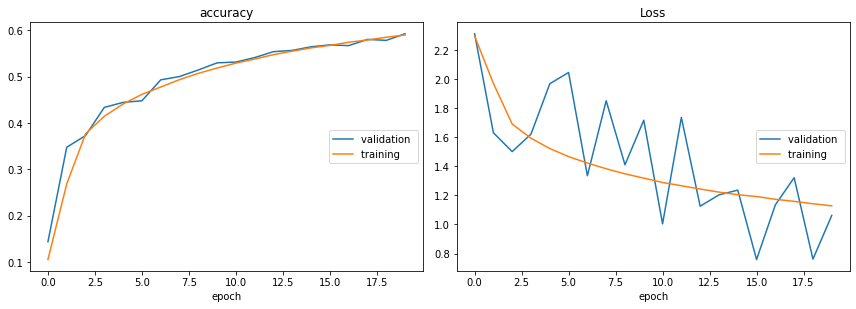

accuracy
	validation       	 (min:    0.144, max:    0.592, cur:    0.592)
	training         	 (min:    0.106, max:    0.590, cur:    0.590)
Loss
	validation       	 (min:    0.759, max:    2.314, cur:    1.062)
	training         	 (min:    1.128, max:    2.299, cur:    1.128)
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


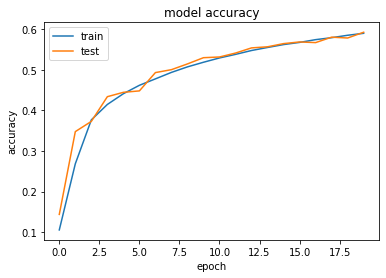

Scores:  [1.1792320013046265, 0.5921555757522583]
Accuracy: 59.22%
Erro modelo CNN cifar10 simples: 40.78%


In [8]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
from PIL.Image import fromarray
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
import  tensorflow as tf
import keras.backend.tensorflow_backend as tfback

def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

# fixar random seed para se puder reproduzir os resultados
seed = 9
np.random.seed(seed)

#util para visualizar a topologia da rede num ficheiro em pdf ou png
def print_model(model,fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)

def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Etapa 1 - preparar o dataset
'''
fazer o download do CIFAR10 dataset com 60,000 fotos a cores de dimensão 32x32,
divididas em 10 classes (e.g. aviões, automoveis, passaros, gatos,...).
dataset: http://www.cs.toronto.edu/~kriz/cifar.html
O dataset está dividido em 50,000 imagens para treino e 10,000 para teste do modelo
treinado.
Neste dataset muito bons resultados são com acc >90%, conseguindo os humanos ~94%,
state of the arte está em 96%
'''
import os
import pickle
from keras.utils.data_utils import get_file

# Etapa 1 - preparar o dataset
'''
Utilitário para fazer o parse dos dados do CIFAR.
- fpath: path do ficheiro a fazer parse.
- label_key: key do label data no dicionário a retornar
# Retorna um tuplo `(data, labels)`.
'''
def load_batch(fpath, label_key='labels'):
    f = open(fpath, 'rb')
    d = pickle.load(f, encoding='bytes')
    d_decoded = {}
     # decode utf8
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    f.close()
    data = d['data']
    labels = d[label_key]
    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels

# Etapa 1 - preparar o dataset
def load_cfar10_dataset():
    '''Loads CIFAR10 dataset, Retorna um tuplo de matrizes Numpy: `(x_train, y_train),
    (x_test, y_test)`. '''
    dirname = 'cifar-10-batches-py'
    origin = 'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
    path = get_file(dirname, origin=origin, untar=True)
    num_train_samples = 50000
    x_train = np.zeros((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train = np.zeros((num_train_samples,), dtype='uint8')
    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        data, labels = load_batch(fpath)
        x_train[(i - 1) * 10000: i * 10000, :, :, :] = data
        y_train[(i - 1) * 10000: i * 10000] = labels
    fpath = os.path.join(path, 'test_batch')
    x_test, y_test = load_batch(fpath)
    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))
    if K.image_data_format() == 'channels_last':
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)
    return (x_train, y_train), (x_test, y_test)

def visualize_cifar10():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    #(X_train, y_train), (X_test, y_test) = load_cfar10_dataset()
    print(y_train)
    for i in range(0, 9):# cria uma grelha com 3x3 imagens
        plt.subplot(330 + 1 + i)
        plt.imshow(fromarray(X_train[i]))
        plt.show()

# Etapa 2 - Definir a topologia da rede (arquitectura do modelo) e compilar
def create_compile_model_cnn_cifar10_evoluida(num_classes,epochs):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    lrate = 0.1
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

PATH = 'CINIC-10'
def load_cinic10():
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    training_set = train_datagen.flow_from_directory(PATH+'/train',
                                                     target_size=(32, 32),
                                                     batch_size=64,
                                                     class_mode='categorical')  #tb podia ser class_mode='categorical'
    val_set = val_datagen.flow_from_directory(PATH+'/valid',
                                                target_size=(32, 32),
                                                batch_size=64,
                                                class_mode='categorical')
    return training_set, val_set

def cinic10_utilizando_cnn_evoluida():
    training_set, val_set = load_cinic10()
    num_classes = 10
    epochs = 20 #25
    model = create_compile_model_cnn_cifar10_evoluida(num_classes,epochs)
    print(model.summary())
    print_model(model,"modelT6.5_plus.png")
    plotlosses = PlotLossesKeras()
    history=model.fit_generator(training_set, validation_data=val_set, epochs=epochs, verbose=2, callbacks=[plotlosses])
    print_history_accuracy(history)
    #print_history_loss(history)
    # Avaliação final com os casos de teste
    scores = model.evaluate_generator(val_set, verbose=0)
    print('Scores: ', scores)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    print("Erro modelo CNN cifar10 simples: %.2f%%" % (100-scores[1]*100))

if __name__ == '__main__':
    #visualize_mnist()
    cinic10_utilizando_cnn_evoluida()